# Carcinoma do endométrio do corpo uterino
Autores: Duarte Velho(pg53841), Joana Lopes(pg53498), Ricardo Oliveira(pg53501)

<p align="justify">
Este trabalho foi desenvolvido no âmbito da UC Extração de Conhecimentos de Dados Biológicos (2023/24), do Mestrado em Bioinformática da Escola de Engenharia da Universidade do Minho, e tem como objetivo a análise de um conjunto de dados de expressão genética relacionados com o Carcinoma Endometrial do Corpo Uterino utilizando python e os seus diversos packages.
</p>

## 1ª parte
<p align="justify">
A primeira fase deste trabalho será constituída pelas seguintes etapas: - explicação dos dados, sua origem e relevância; - tarefas de preparação e de pré-processamento dos dados; - sumarização dos dados (estatística descritiva, exploração com recurso a gráficos); - análise estatística univariada e análise de expressão diferencial e de enriquecimento.
</p>

### Instalação e importação de packages
<p align="justify">
Nesta secção são destacados todos os packages utilizados no trabalho, que facilitam a aquisição e análise de dados ao longo do documento, tornando mais eficiente a obtenção e compreensão das informações relevantes.
</p>

In [1]:
import pandas as pd
import re
import matplotlib as plt

### Introdução

#### Enquadramento

<p align="justify">
Nos dias de hoje, o cancro é uma das principais causas de morte a nível mundial, sendo que, segundo a Organização Mundial da Saúde (OMS), em 2020, foram diagnosticados cerca de 19,3 milhões de novos casos de cancro, que resultaram na morte, de aproximadamente 10 milhões de pessoas [1].
O preocupante aumento da incidência do cancro ao longo das últimas décadas, levou ao surgimento de iniciativas, tal como a PanCancer Atlas, que visam encontrar respostas para as grandes e abrangentes questões sobre o cancro, através da análise de tumores caracterizados no conjunto de dados resultantes do projeto de The Cancer Genome Atlas (TCGA).
O TCGA é um programa de genómica de referência na área do cancro que, em colaboração com o Instituto Nacional do Cancro (NCI) e o Instituto Nacional de Pesquisa do Genoma Humano (NHGRI) dos Estados Unidos, caracterizou mais de 20 mil cancros primários abrangendo 33 tipos de cancro.
Os tipos de cancro selecionados para estudo cumprem requisitos tais como ter um mau prognóstico, ter um impacto geral na saúde pública, disponibilidade de amostras com a qualidade e quantidade desejadas, entre outros.
(National Cancer Institute, 2022)

O cancro endometrial do corpo uterino, um dos cancros incluídos no TCGA, é o sétimo tumor maligno mais frequente no mundo e o quarto mais comum na mulher sendo a doença ginecológica maligna dominante, tendo provocado em 2011 mais de 8 mil mortes [2, 3].
De todos os cancros do corpo uterino mais de 83% correspondem a carcinomas do endométrio, enquanto apenas 10% dos diagnósticos são classificados como sarcomas [2].
Este tipo de cancro tem ganho maior atenção por parte da comunidade científica, uma vez que se verificou um aumento da sua incidência com a agravante de que a taxa de sobrevivência aos 5 anos é consideravelmente menor, em comparação com o ano de 1975, passando de 88% para cerca de 84%, em 2006, indicando um aumento na mortalidade [3].
A taxa de sobrevivência está fortemente correlacionada com o estádio da doença aquando do diagnóstico, sendo que para pacientes no estádio inicial se considera curável atingindo cerca de 96% de sobrevivência.
No entanto, para fases mais avançadas e de alto grau, é considerado letal reduzindo drasticamente a taxa de sobrevivência para 17%.
</p>

#### Objetivo

<p align="justify">
Com base na problemática apresentada, este trabalho tem como objetivo analisar o perfil transcriptómico de células endometeriais do corpo uterino de pacientes diagnosticados com cancro para determinadas condições descritas nos metadados, de modo a realizar a análise da expressão diferencial com o intuito de compreender qual o efeito do fator no perfil transcriptómico das células e como esse perfil se traduz na gravidade da doença observada.
Os dados utilizados neste trabalho estão disponíveis no [GDC DataPortal](https://shorturl.at/fmpJ5).
</p>

### Extração dos dados de transcriptómica e respetivos metadados da base de dados

#### Obtenção dos dados

<p align="justify">
Com o objetivo de analisar os dados de transcriptómica referente ao carcinoma endometrial do corpo uterino, procedemos à extração da informação que se encontra presente no website cBioPortal, onde se encontram disponibilizados, de forma gratuita, uma grande diversidade de alterações genómicas de vários tipos de cancro, incluindo o cancro selecionado para estudo.
Como no trabalho anterior já procedemos ao download dos dados de expressão genética e dos seus respetivos metadados, apenas se realizou a leitura dos respetivos dados utilizando o package pandas.
</p>

In [2]:
# atenção demora a correr (no meu pc demorou 6min a ler os ficheiros)
gene_exp = pd.read_excel(io="../Data/expressao_genetica.xlsx", index_col=0)
genes_meta = pd.read_excel(io="../Data/genes_metadados.xlsx", index_col=0)
amostras_meta = pd.read_excel(io="../Data/amostras_metadados.xlsx", index_col=0)

In [3]:
print(f"Classe dos dados de expressão:{type(gene_exp)}")
print(f"Classe dos dados de expressão:{type(genes_meta)}")
print(f"Classe dos dados de expressão:{type(amostras_meta)}")
print(f"\nO dataframe da expressão genética tem {gene_exp.shape[0]} linhas e {gene_exp.shape[1]} colunas")
print(f"O dataframe dos genes possui {genes_meta.shape[0]} linhas e {genes_meta.shape[1]} colunas")
print(f"O dataframe das amostras tem {amostras_meta.shape[0]} linhas e {amostras_meta.shape[1]} colunas")
print(f"\nNomes das 5 primeiras colunas do dataframe de expressão genética: {gene_exp.columns.values[0:5]}")
print(f"Nomes das 5 primeiras colunas do dataframe dos genes: {genes_meta.columns.values[0:5]}")
print(f"Nomes das 5 primeiras colunas do dataframe das amostras: {amostras_meta.columns.values[0:5]}")

Classe dos dados de expressão:<class 'pandas.core.frame.DataFrame'>
Classe dos dados de expressão:<class 'pandas.core.frame.DataFrame'>
Classe dos dados de expressão:<class 'pandas.core.frame.DataFrame'>

O dataframe da expressão genética tem 60660 linhas e 589 colunas
O dataframe dos genes possui 60660 linhas e 10 colunas
O dataframe das amostras tem 589 linhas e 78 colunas

Nomes das 5 primeiras colunas do dataframe de expressão genética: ['TCGA-FI-A3PX-01A-11R-A22K-07' 'TCGA-BG-A221-01A-21R-A157-07'
 'TCGA-EY-A1GK-01A-11R-A13S-07' 'TCGA-BG-A2AE-01A-11R-A16F-07'
 'TCGA-AX-A1CE-01A-11R-A137-07']
Nomes das 5 primeiras colunas do dataframe dos genes: ['source' 'type' 'score' 'phase' 'gene_id']
Nomes das 5 primeiras colunas do dataframe das amostras: ['barcode' 'patient' 'sample' 'shortLetterCode' 'definition']


<p align="justify">
Através da análise exploratória inicial dos dados verificou-se que os dados de expressão genénitca, os dados dos genes e das amostras estão no formato de dataframe. O dataframe da expressão genética é constituído por 60660 linhas que correspondem ao genes para o qual se estudou a sua expressão genética e 589 colunas que representam as amostras análisadas no estudo. Para cada gene existem 10 colunas de metadados associados que acrescentam informação adicional sobre os genes, incluindo o gene_id (código Ensembl), tal como a sua fonte, o nome do gene, entre outros atributos, que podem ser acessados e explorados.
Em relação às amostras, existem 78 colunas de metadados que possibilitam a caracterização das 589 amostras utilizadas neste estudo possibilitando a análise do impacto que as diversas características possuem no estádio ou na gravidade da doença com base nos dados da expressão genética de cada amostra.
</p>

<p align="justify">
Por diversas razões várias vezes os metadados associadas às amostras possuem elevada quantidade de valores omissos, o que pode levar a uma redução considerável das amsotras utilizadas em estudo caso a variável que se pretende análisar seja uma das que apresenta elevada percentagem de valores omissos. Para evitar tal acontecimento, primeiramente procedeu-se a uma filtragem do datafram "amostras_meta" com o inuito de apenas preservar as variavíes que possuem menos de 10% de valores omissos
</p>

In [4]:
# filtrar as colunas que são objetos
data_types = amostras_meta.dtypes
string_cols = data_types[data_types == 'object'].index
amostras_meta_filtered = amostras_meta[string_cols]


# Identificar colunas com mais de 60 contagens de "not reported" 
rm_not_reported = amostras_meta_filtered.apply(lambda x: x.str.lower().str.count("not reported").sum() > 60)
rm_not_reported = rm_not_reported.index[rm_not_reported].tolist()


# Identificar colunas com mais de 60 contagens de "unkown" 
rm_unkown = amostras_meta_filtered.apply(lambda x: x.str.lower().str.count("unknown").sum() > 60)
rm_unkown = rm_unkown.index[rm_unkown].tolist()


# Identificar colunas com mais de 60 valores NA
rm_nas = amostras_meta.isna().sum() > 60
rm_nas = rm_nas.index[rm_nas].tolist()


# Remover colunas identificadas
amostras_meta_reduzido = amostras_meta.drop(columns=rm_not_reported + rm_unkown + rm_nas)


# Obter dimensões do DataFrame reduzido
dimensao = amostras_meta_reduzido.shape
print(f"Dimensões do DataFrame filtrado: {dimensao}")
print(f"\nNomes das colunas do dataframe das amostras filtrado: {amostras_meta.columns.values}")


Dimensões do DataFrame filtrado: (589, 46)

Nomes das colunas do dataframe das amostras filtrado: ['barcode' 'patient' 'sample' 'shortLetterCode' 'definition'
 'sample_submitter_id' 'sample_type_id' 'tumor_descriptor' 'sample_id'
 'sample_type' 'composition' 'days_to_collection' 'state' 'initial_weight'
 'preservation_method' 'pathology_report_uuid' 'submitter_id'
 'oct_embedded' 'specimen_type' 'is_ffpe' 'tissue_type' 'figo_stage'
 'synchronous_malignancy' 'days_to_diagnosis' 'treatments'
 'last_known_disease_status' 'tissue_or_organ_of_origin'
 'days_to_last_follow_up' 'age_at_diagnosis' 'primary_diagnosis'
 'prior_malignancy' 'year_of_diagnosis' 'prior_treatment' 'morphology'
 'classification_of_tumor' 'diagnosis_id' 'icd_10_code'
 'site_of_resection_or_biopsy' 'tumor_grade' 'progression_or_recurrence'
 'alcohol_history' 'exposure_id' 'race' 'gender' 'ethnicity'
 'vital_status' 'age_at_index' 'days_to_birth' 'year_of_birth'
 'demographic_id' 'year_of_death' 'days_to_death' 'bcr_pati

<p align="justify">
Com esta filtragem o número de colunas passou de 78 para 46 garantindo assim que as características que possam ser utilizadas para as análises posteriores abrangem a maioria das amostras garantindo maior confiabilidade na análise realizada.
</p>

### Análise Descritiva e Exploratória
<p align="justify">
Para o nosso estudo, de entre as colunas de metadados reduzida, selecionou-se 4 variáveis de caraterísticas distintas, nomeadamente as colunas "vital_status", "primary_diagnosis", "age_at_index" e "figo_stage" para se proceder a uma análise descritiva e exploratória das amostras.
</p>

In [5]:
meta_amostras = amostras_meta_reduzido[["vital_status", "primary_diagnosis", "age_at_index","figo_stage"]]

# substituir os valores de figo state apenas pelas iniciais
meta_amostras['figo_stage'] = meta_amostras['figo_stage'].replace(r'.*\b(Stage [VI]+).*', r'\1', regex=True)

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_5104\342081174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_amostras['figo_stage'] = meta_amostras['figo_stage'].replace(r'.*\b(Stage [VI]+).*', r'\1', regex=True)


In [6]:
meta_amostras["figo_stage"]

row.names(amostras_metadados)
TCGA-FI-A3PX-01A-11R-A22K-07    Stage III
TCGA-BG-A221-01A-21R-A157-07      Stage I
TCGA-EY-A1GK-01A-11R-A13S-07      Stage I
TCGA-BG-A2AE-01A-11R-A16F-07      Stage I
TCGA-AX-A1CE-01A-11R-A137-07      Stage I
                                  ...    
TCGA-AJ-A3NF-01A-11R-A22K-07    Stage III
TCGA-BK-A0C9-01A-11R-A00V-07      Stage I
TCGA-AJ-A5DW-01A-11R-A27V-07      Stage I
TCGA-AP-A05J-01A-11R-A00V-07     Stage II
TCGA-D1-A103-01A-11R-A10J-07      Stage I
Name: figo_stage, Length: 589, dtype: object

### Análise de expressão diferencial 

In [7]:
# Filtrar amostras onde primary_diagnosis não é NaN
amostras_filtradas = meta_amostras.dropna(subset=['primary_diagnosis'])

# Filtrar amostras com primary_diagnosis igual a "Endometrioid adenocarcinoma, NOS"
amostras_filtradas = amostras_filtradas[amostras_filtradas['primary_diagnosis'] == "Endometrioid adenocarcinoma, NOS"]

# Selecionar dados de expressão gênica correspondentes às amostras filtradas
dados_EA = gene_exp.loc[:, amostras_filtradas.index]

# Dimensão dos dados_EA
dimensao_dados_EA = dados_EA.shape

print(dimensao_dados_EA)

(60660, 423)


In [8]:
# Contar o número de valores NaN na coluna 'vital_status' de amostras_filtradas
num_na_vital_status = amostras_filtradas['figo_stage'].isna().sum()

print(num_na_vital_status)

0


In [9]:
#pip install scanpy scipy

In [9]:
import scanpy as sc

In [10]:
#transposta de dados_EA para atribuição ao objeto adata
adata = sc.AnnData(dados_EA.T)

In [11]:
# Filtrar células e genes de baixa qualidade
sc.pp.filter_cells(adata, min_genes=20)
sc.pp.filter_genes(adata, min_cells=4)

# Normalizar os dados
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [12]:
adata.obs['condition'] = amostras_filtradas['figo_stage'].values

In [13]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]

In [14]:
sc.pp.scale(adata, max_value=10)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_scale.py:299: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [15]:
import numpy as np

In [16]:
# Substituir valores negativos por zero (ou outro valor positivo pequeno), isto porque ao fazer scale dos dados podemos obter valores negativos
adata.X = np.where(adata.X < 0, 0.1, adata.X)

In [17]:
# Definir a condição a ser analisada
adata.obs['condition'] = adata.obs['condition'].astype('category')

# Realizar a análise de expressão diferencial
sc.tl.rank_genes_groups(adata, groupby='condition', method='wilcoxon', groups=['Stage IV'], reference='Stage I')

# Obter os resultados
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names

# Converter os resultados para DataFrame
de_genes = pd.DataFrame({group: result['names'][group] for group in groups})
de_pvals = pd.DataFrame({group: result['pvals'][group] for group in groups})
de_logfoldchanges = pd.DataFrame({group: result['logfoldchanges'][group] for group in groups})

# Supondo que você está interessado na comparação 'alive' vs 'dead'
group_of_interest = 'Stage IV'

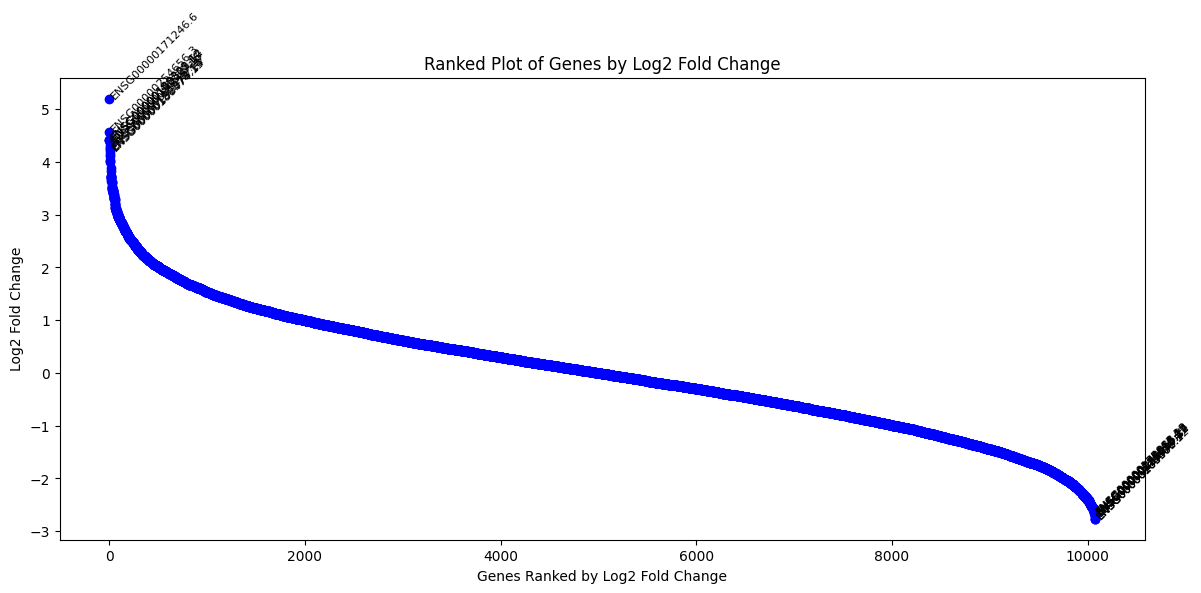

In [18]:
import matplotlib.pyplot as plt

# Converter os resultados para DataFrame
de_genes = pd.DataFrame(result['names'])
de_logfoldchanges = pd.DataFrame(result['logfoldchanges'])
de_pvals = pd.DataFrame(result['pvals_adj'])  # Usar p-values ajustados se disponíveis

# Selecionar o grupo de interesse
group_of_interest = 'Stage IV'

# Preparar os dados para o plot
log2FoldChange = de_logfoldchanges[group_of_interest].values
gene_names = de_genes[group_of_interest].values

# Criar o DataFrame consolidado
resultados = pd.DataFrame({
    'log2FoldChange': log2FoldChange,
    'gene_name': gene_names
})

# Ordenar os resultados pela alteração na expressão em ordem decrescente
resultados_ord = resultados.sort_values(by='log2FoldChange', ascending=False)

# Preparar os dados para o plot
ranked_genes = resultados_ord['log2FoldChange'].values
gene_names = resultados_ord['gene_name'].values

# Plotar
plt.figure(figsize=(14, 6))
plt.plot(ranked_genes, 'bo')
plt.xlabel('Genes Ranked by Log2 Fold Change')
plt.ylabel('Log2 Fold Change')
plt.title('Ranked Plot of Genes by Log2 Fold Change')

# Marcar os genes mais expressos e menos expressos
for i, gene in enumerate(gene_names[:10]):
    plt.text(i, ranked_genes[i], gene, fontsize=8, rotation=45)
for i, gene in enumerate(gene_names[-10:]):
    plt.text(len(ranked_genes) - 10 + i, ranked_genes[-10 + i], gene, fontsize=8, rotation=45)

plt.show()

In [19]:
resultados_ord['gene_name'] #imprimir os nomes dos genes ordenados de acordo com o log fold change em ordem decrescente"

106       ENSG00000171246.6
1321      ENSG00000254656.3
230      ENSG00000108309.14
33       ENSG00000132821.12
67        ENSG00000140323.6
                ...        
10017    ENSG00000125434.11
9983      ENSG00000114638.8
10027     ENSG00000163501.7
10080    ENSG00000164488.12
10044     ENSG00000260676.5
Name: gene_name, Length: 10081, dtype: object

<p align="justify">
Através da análise dos gráficos, podemos ver que o gene **ENSG00000171246.6** é o que se encontra mais expresso para a condição de estadio IV do tumor (tendo como comparativo o estadio I). Este gene pode ser acedido no NCBI gene através do seu identificador, onde é descrito como codificador de uma proteína, **NPTX1** (neuronal pentraxin 1). Após uma breve pesquisa na literatura existente, estudos apontam para a envolvência de NPTX1 em processos de indução de apoptose em diferentes tipos celulares. Um estudo conduzido em 2014, cujo objetivo foi entender como os contraceptivos progestativos afetam as células do endométrio, revelou que em mulheres que receberam contracetivos progestativos de longa duração se observou um aumento na expressão de NPTX1 no endométrio e que, o aumento da expressão de NPTX1 estava associado à indução de apoptose (morte celular programada) em células endoteliais do endométrio(Guzeloglu-Kayisli et al., 2014). Ou seja, os achados relacionados à expressão aumentada de NPTX1 e sua indução de apoptose nas células endoteliais podem fornecer insights importantes sobre os processos biológicos subjacentes a distúrbios uterinos. Relacionando com o nosso dataset, estes achados podem de facto fazer sentido, uma vez que o aumento da apoptose das células endoteliais e a instabilidade vascular podem facilitar a invasão tumoral e a disseminação metastática do câncer de endométrio. 
</p>

<p align="justify">
Por outro lado, através do comando **resultados_ord['gene_name']** vemos que o gene que se encontra menos expresso para a condição de estadio IV do tumor (tendo como comparativo o estadio I) é o gene **ENSG00000260676.5**. Também conhecido como "Uterine Endometrial Carcinoma-Associated Transcript", este gene, **LINC01541**, é uma sequência de RNA longo que não codifica proteínas e está localizado em um região intergênica do genoma. Um estudo cujo objetivo foi investigar o papel do gene LINC01541 na endometriose, revelou que o silenciamento de LINC01541 (redução da expressão) aumentou significativamente as capacidades migratórias e invasivas das células para tecidos circundantes, ou seja, as células tornaram-se mais propensas a se moverem e invadirem outros tecidos (Mai et al., 2019). Desta forma, no contexto do nosso dataset, os resultados obtidos na expressão diferencial parecem fazer sentido, isto é, uma vez que estamos a observar a expressão génica para a condição de estadio IV do tumor, que representa a forma mais agressiva do tumor onde há extensão do tumor para estruturas adjacentes, seria de esperar que este gene se encontra-se subexpresso e é, efetivamente, o que verficamos. 
</p>

<p align="justify">
### Redução da dimensionalidade
As técnicas Principal Component Analysis (PCA) e t-Distributed Stochastic Neighbor Embedding (t-SNE) são duas técnicas de redução de dimensionalidade amplamente utilizadas na análise de dados. Ambas têm como objetivo reduzir a complexidade dos dados, eliminando a redundância (muito caraterísitca em datasets desta natureza) permitindo a visualização e a compreensão de padrões ou estruturas subjacentes. Muitas vezes, é útil usar ambos em conjunto: PCA para uma visão geral dos dados e t-SNE para uma visualização mais detalhada e interpretação de padrões locais.
</p>

#### PCA

In [20]:
dados_EA_transpostos = dados_EA.transpose()

In [21]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [22]:
array_data = preprocessing.scale(dados_EA_transpostos)
data_scale =  pd.DataFrame(array_data, index =dados_EA_transpostos.index , columns = dados_EA_transpostos.columns)

In [23]:
pca_cach = PCA(n_components=2)
pca_cach.fit(data_scale)
X_r = pca_cach.transform(data_scale) # transformacao dos dados no novo espaço utilizando apenas 5 CP
print('Var. explicada: %s'% str(pca_cach.explained_variance_ratio_))
print('Soma:', sum(pca_cach.explained_variance_ratio_) * 100, "%")

Var. explicada: [0.14719413 0.10970642]
Soma: 25.6900543663709 %


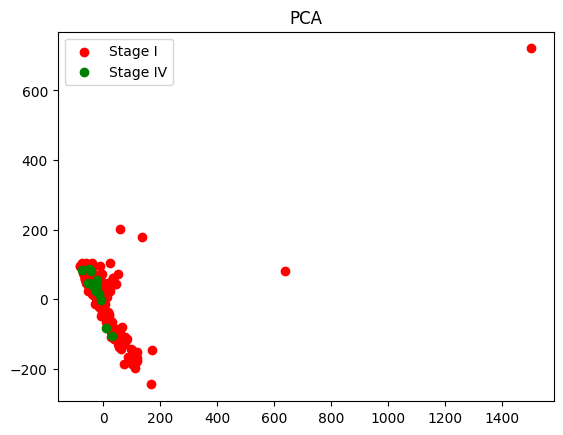

In [24]:
meta_values = amostras_filtradas["figo_stage"]
plt.figure()
for c, name in zip("rg", ["Stage I", "Stage IV"]):
    plt.scatter(X_r[meta_values == name, 0], X_r[meta_values == name, 1], c=c, label=name)
plt.legend()
plt.title('PCA')
plt.show()

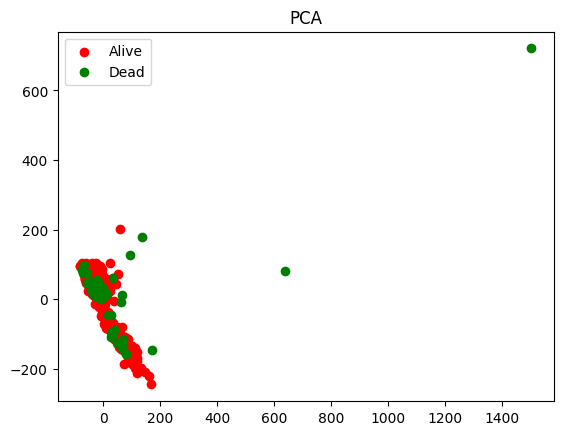

In [25]:
meta_values2 = amostras_filtradas["vital_status"]
plt.figure()
for c, name in zip("rg", ["Alive", "Dead"]):
    plt.scatter(X_r[meta_values2 == name, 0], X_r[meta_values2 == name, 1], c=c, label=name)
plt.legend()
plt.title('PCA')
plt.show()

<p align="justify">
Como podemos ver através do primeiro e segundo gráficos, os dados são mostrados em função do "figo_stage" e em função do "vital_status" respetivamente, e, vemos que estes não conseguem ser explicados por nenhuma das condições de metadados, uma vez que não há uma divisão clara entre os grupos. No entanto, devemos ressalvar que os os PC1 e PC2 apenas explicam 25.69% da variabilidade dos nossos dados, logo, não é possível retirar uma conclusão segura destes gráficos.
</p>

#### t-SNE

In [26]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)
points = tsne.fit_transform(data_scale)

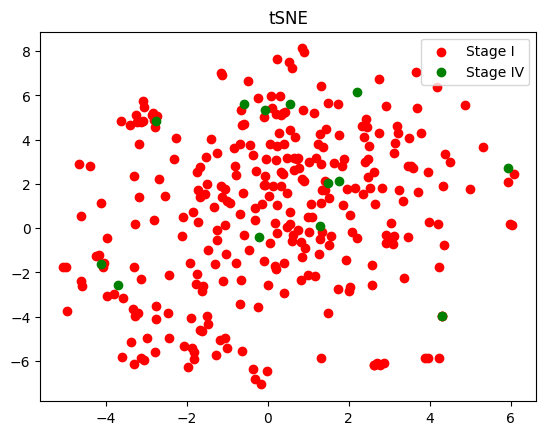

In [27]:
plt.figure()
for c, name in zip("rg", ["Stage I", "Stage IV"]):
    plt.scatter(points[meta_values == name, 0], points[meta_values == name, 1], c=c, label=name)
plt.title("tSNE")
plt.legend(loc='best', shadow=False)
plt.show()

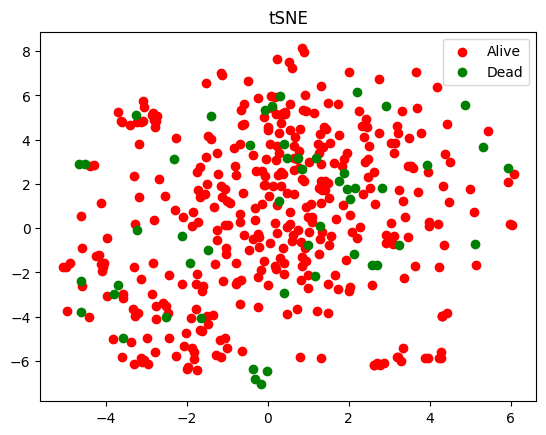

In [28]:
plt.figure()
for c, name in zip("rg", ["Alive", "Dead"]):
    plt.scatter(points[meta_values2 == name, 0], points[meta_values2 == name, 1], c=c, label=name)
plt.title("tSNE")
plt.legend(loc='best', shadow=False)
plt.show()

<p align="justify">
Da mesma maneira, através da técnica de t-SNE, não conseguimos explicar a variabilidade dos dados com base nas duas condições mencionadas acima.
</p>

### Clustering
<p align="justify">
O clustering é uma técnica de aprendizagem não supervisionada que identifica padrões e a estrutura nos dados, agrupando-os em conjuntos homogéneos. Utiliza medidas de distância ou similaridade para agrupar pontos de dados próximos, procurando maximizar a coesão intra-cluster e a separação inter-cluster. Esses grupos podem revelar insights sobre a estrutura subjacente dos dados.
</p>

<p align="justify">
No nosso relatório, foram abordados dois algoritmos de clustering: K-means, que é um algoritmo de clustering que divide um conjunto de dados em K clusters, minimizando a soma dos quadrados das distâncias entre os pontos e os centroides; e clustering hierárquico, que constrói uma árvore de clusters, onde cada nó representa um cluster.
</p>

#### Hierárquico

<p align="justify">
Este tipo de clustering baseia-se na probabilidade de pertencer a um grupo e segue uma abordagem aglomerativa (recorrendo à estratégia bottom-up), começando pelas folhas até à raiz da árvore. A análise do cluster hierárquico usa a distânca Euclidiana para calcular a proximidade entre os pontos num espaço multidimensional, considerando todas as dimensões.
</p>

In [29]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

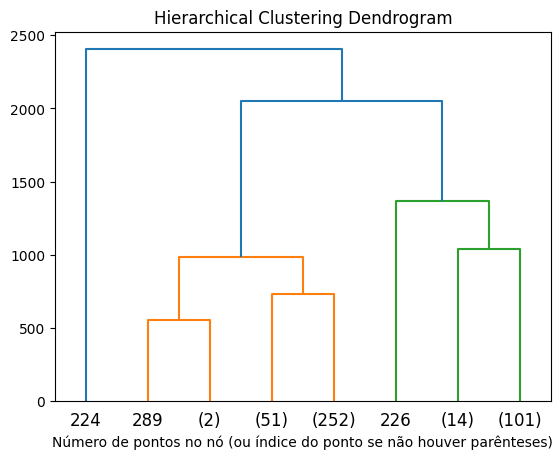

In [30]:
X = data_scale

# Inicialização do modelo de clustering hierárquico
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Ajuste do modelo aos seus dados
model.fit(X)

# Plotagem do dendrograma
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Número de pontos no nó (ou índice do ponto se não houver parênteses)")
plt.show()

#### K-Means

<p align="justify">
Esta abordagem de clustering, agrupa os dados de forma a minimizar as distâncias entre os pontos e centróides dos clusters. Um método muito utilizado para auxiliar na determinação do número adequado de clusters é o “método do cotovelo”. Este método envolve a análise da variação da soma dos quadrados intra-cluster (WSS) em relação ao número de clusters.
</p>

[22003756.80508829, 21365735.762092568, 19039092.15394213, 18710487.02557339, 18922231.499951772, 16885544.654392127, 16881637.821824193, 16880296.88018752, 16305647.517548561]


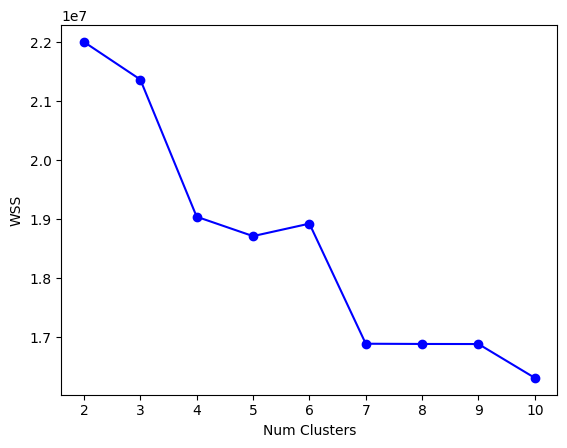

In [31]:
from sklearn.cluster import KMeans

ofs = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init = "auto")
    kmeans.fit(data_scale)
    ofs.append(kmeans.inertia_)

print(ofs)
plt.plot(range(2, 11), ofs, 'b-o')
plt.xlabel('Num Clusters')
plt.ylabel('WSS')
plt.show()


In [ ]:
#k=3

<p align="justify">
Através da observação do gráfico verificou-se que o ponto no gráfico que se assemelha a um “cotovelo” é o ponto K=3. A partir do ponto k=3, a adição de mais clusters não resulta numa redução significativa da WSS.
Partindo desse princípio, decidiu-se aplicar o algoritmo do K-means, de modo a criar uma tabela que permitisse analisar a distribuição das amostras nos clusters em relação ao metadado estudado (figo_stage).
</p>

In [32]:
kmeans3 = KMeans(n_clusters=3, n_init = "auto")
res_kmeans = kmeans3.fit(data_scale).predict(array_data)

pd.crosstab(amostras_filtradas.loc[:,"figo_stage"], res_kmeans)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


col_0,0,1,2
figo_stage,,,
Stage I,49,227,23
Stage II,11,20,4
Stage III,15,54,7
Stage IV,2,11,0


<p align="justify">
Observando a tabela, verificou-se que existem clusters que têm uma separação diferenciada dos dados no que toca ao metadado analisado (figo_stage), cumprindo o principal propósito do k-means.No entanto, existem clusters cuja separação dos dados não é a clara.
</p>

# Machine Learning

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns

<p align="justify">
A análise supervisionada é uma abordagem de machine learning na qual os modelos são treinados com um conjunto de dados de entrada, juntamente com os rótulos associados a esses dados. Durante o treino, o modelo aprende a relação entre os dados de entrada e a sua classificação através de ajustes iterativos de modo a minimizar o erro entre as previsões e as classificações dos dados de treino. Após o treino, os modelos são utilizados para realizar a previsão da classificação de um novo conjunto de dados em que não se sabe a sua classificação.
</p>

<p align="justify">
Para dados de expressão, os modelos de machine learning podem ser utilizados para vários fins. Estes modelos são, por exemplo, utilizados para realizar a previsão de fenótipos com base no perfil de expressão genética sendo úteis para prever a resposta de um paciente a um determinado tratamento ou para prever a gravidade da doença e como esta poderá progredir com o tempo.
</p>

<p align="justify">
A primeira fase de machine learning consite na preparação dos dados de expressão genética para posteriomente serem utilizados para o treino do modelo e consequente teste do modelo.
</p>

In [46]:
# Copy the original dataframe
amostras_filtradas 

,vital_status,primary_diagnosis,age_at_index,figo_stage
row.names(amostras_metadados),,,,
TCGA-BG-A221-01A-21R-A157-07,Alive,"Endometrioid adenocarcinoma, NOS",84.0,Stage I
TCGA-EY-A1GK-01A-11R-A13S-07,Alive,"Endometrioid adenocarcinoma, NOS",74.0,Stage I
TCGA-AX-A1CE-01A-11R-A137-07,Alive,"Endometrioid adenocarcinoma, NOS",60.0,Stage I
TCGA-D1-A1O8-01A-11R-A14D-07,Dead,"Endometrioid adenocarcinoma, NOS",70.0,Stage III
TCGA-DI-A0WH-01A-12R-A12I-07,Alive,"Endometrioid adenocarcinoma, NOS",64.0,Stage I
...,...,...,...,...
TCGA-EY-A549-01A-11R-A27V-07,Alive,"Endometrioid adenocarcinoma, NOS",78.0,Stage I
TCGA-D1-A1O7-01A-11R-A14D-07,Alive,"Endometrioid adenocarcinoma, NOS",60.0,Stage I
TCGA-BK-A0C9-01A-11R-A00V-07,Alive,"Endometrioid adenocarcinoma, NOS",57.0,Stage I


In [47]:
# X, i.e. the features or attributes
characters=amostras_filtradas.to_numpy()
# y, i.e. the class attribute where 0=Dead and 1=Alive
type_label=amostras_filtradas['vital_status'].to_numpy()
#common mapping
X=characters #rest of data
Y=type_label #0 or 1

# Normalização

<p align="justify">
A normalização é uma fase crucial ligada ao pré-processamento de dados para modelos de aprendizagem de máquina. Esta prática é fundamental para evitar questões relacionadas com a escala dos valores presentes no conjunto de dados. No contexto deste relatório, optou-se por uma técnica de normalização que ajusta os dados para que estes variem somente entre 0 e 1, definindo-se 0 como o valor mínimo, e 1 como o valor máximo.
</p>

In [48]:
min_max_escala = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Divisão do Dataset

<p align="justify">
Após a filtragem dos genes diferencilamente expressos, procedeu-se à criação do dataset de treino e de teste sendo que se utilizou 70% dos dados para a criação do dataset de treino e cerca de 30% para o dataset de teste.
</p>

In [51]:
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, stratify=Y,  test_size=0.3, random_state=42, shuffle=True)

In [52]:
sss = StratifiedKFold(n_splits =10, random_state=42, shuffle=True) 

<p align="justify">
</p>
Na seguinte etapa do trabalho realizaram-se previsões, tendo por base os dados existentes, opor outras palavras, previu-se a classificação  de uma nova amostra.
Para tal, foram treinados e testados 2 modelos: Random Forest e k-Nearest Neighbors.
</p>

<p align="justify">
Para cada modelo, exploraram-se diversos hiperparâmetros. Recorreu-se a uma técnica de otimização de hiperparâmetros bastante utilizada em ML que se denomina Gridsearch. Nesta técnica, um conjunto de hiperparâmetros é especificado e todas as combinações possíveis desses hiperparâmetros são avaliadas usando validação cruzada. O objetivo foi encontrar a combinação de hiperparâmetros que resulte no melhor desempenho do modelo, sendo que se optou pela métrica do f1-score como referência.
</p>

<p align="justify">
Neste trabalho, teve-se sempre em consideração um processo de validação cruzada de 10 vezes, do conjunto de dados de treino, em que uma parte do conjunto de dados, denominada de conjunto de validação, foi usada para teste e as outras nove foram usadas para treino. Este processo foi iterado mais de dez vezes, usando, por sua vez, cada uma das dez partes como conjunto de validação. Como se verificou anteriormente, a distribuição dos dados por classe é de aproximadamente 55% 45%  para a classe 1 e 0 , respetivamente. Assim sendo, usou-se amostragem estratificada para garantir que há uma percentagem semelhante à existente do dataset original da classe positiva (y=1) e negativa (y=0), quer no dataset treino, como no test. 
</p>

<p align="justify">
Para conhecer a avaliação dos modelos, teve-se por base as confusion matrix obtidas, mais concretamente os valores dos TP, TN, FP e FN. Estes valores são a base das diferentes métricas avaliadas como a precision, accuracy, recall, entre outros.
</p>

<p align="justify">
Em suma, a pipeline realizada daqui em diante para cada um dos modelos de ML e DL mencionados será a seguinte:

1) Otimização dos hiperparâmetros por gridsearch (10 x cross-validation);

2) Treinar o modelo com o melhor conjunto de hiperparâmetros (70 % dataset-treino);

3) Testar o modelo treinado com o dataset test(30% dataset-test);

4) Avaliar as métricas obtidas.
</p>

# k-Nearest Neighbors

<p align="justify">
O algoritmo k-Nearest Neighbors (k-NN), é um algoritmo versátil usado tanto para classificação, quanto para regressão em aprendizagem de máquina. Este método opera sob a premissa de que pontos de dados com características semelhantes tendem a agrupar-se em espaços próximos. O parâmetro "k" no k-NN indica o número de vizinhos mais próximos a serem considerados na hora de predizer a classe de um ponto de dados novo.
</p>

<p align="justify">
Na modalidade de classificação, o k-NN identifica as k instâncias mais próximas do ponto novo, baseando-se numa medida de distância como a Euclidiana, e atribui-lhe a classe que mais aparece entre esses vizinhos. Por exemplo, se k for definido como 5, a classe mais comum entre os cinco vizinhos mais próximos determina a classe do ponto em questão.
</p>

<p align="justify">
Além da sua aplicação em classificação, o k-NN também pode ser empregado para regressão. Nesse caso, ao invés de escolher a classe mais frequente, o algoritmo calcula a média ou a mediana (dependendo da implementação) dos valores dos k vizinhos mais próximos para estimar um valor contínuo.
</p>

<p align="justify">
Um aspecto crucial para o bom desempenho do k-NN é a escolha do número k, que pode variar bastante dependendo do conjunto de dados. Um valor muito pequeno de k pode tornar o modelo sensível a ruídos, enquanto um valor muito grande pode incluir pontos que são, na verdade, distantes e menos similares, degradando a precisão do modelo. A escolha de uma métrica de distância adequada também é fundamental para garantir que as distâncias calculadas refletem as verdadeiras semelhanças entre as instâncias.
</p>

### Explorar os hiperparâmetros e determinar a melhor combinação

In [ ]:
# Definir os hiperparâmetros
parameters = {
    'n_neighbors': [2,3, 5, 7,10,20,100],
    'weights': ['uniform', 'distance'],

}

# Criar o modelo k-NN
knn = KNeighborsClassifier()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(knn, parameters, scoring='f1', cv=5)

# Executar a busca em grid para encontrar os melhores hiperparâmetros
grid_search.fit(X_tr[:, 3:], y_tr)

# Obter os melhores hiperparâmetros encontrados
best_params_KNN = grid_search.best_params_
best_params_KNN

### Treino do modelo k-NN com hiperparâmetros já definidos

In [ ]:
KN_classifier = KNeighborsClassifier(n_neighbors=20,weights="distance")

for train_index, test_index in sss.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    
    X_KN_train, X_KN_test, y_KN_train, y_KN_test =  X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]
    
    X_KN_train_new = X_KN_train
    X_KN_train_new = min_max_escala.fit_transform(X_KN_train_new)
    
    X_KN_test_new = X_KN_test
    X_KN_test_new = min_max_escala.transform(X_KN_test_new)
    
    KN_classifier.fit(X_KN_train_new, y_KN_train)
    y_pred = KN_classifier.predict(X_KN_test_new)

### Avaliação do treino do modelo k-NN

In [ ]:
X_new = X_tr[:,3:]
X_new = min_max_escala.fit_transform(X_new)
KN_classifier.fit(X_new, y_tr)
y_tr_predict = KN_classifier.predict(X_new)
print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)

### Teste do modelo k-NN já treinado e respetivas métricas

In [ ]:
X_te_new = X_te[:,3:]

X_te_new = min_max_escala.transform(X_te_new)

y_KN_pred = KN_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_KN_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_KN_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_KN_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn + fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp + fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

### Confusion Matrix resultante do teste do modelo k-NN

In [ ]:
# Calcula a matriz de confusão
confusion = confusion_matrix(y_te, y_KN_pred)

# Obtém os valores dos verdadeiros positivos (tp), verdadeiros negativos (tn),
# falsos positivos (fp) e falsos negativos (fn)
tn, fp, fn, tp = confusion.ravel()

# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plota a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest 

<p align="justify">
Random Forest (RF), é um método de aprendizagem de máquina que opera através da combinação de múltiplas árvores de decisão para melhorar a robustez e a precisão das previsões. Adequado para tanto classificação quanto regressão, este modelo constrói diversas árvores de decisão durante o treinamento e faz as previsões com base na média dos resultados das árvores para regressão ou na maioria dos votos para classificação.
</p>

<p align="justify">
Embora seja altamente eficaz para uma grande variedade de dados, o Random Forest pode enfrentar desafios quando aplicado a conjuntos de dados desbalanceados. Nestas situações, as classes minoritárias podem não ser representadas adequadamente, levando a um modelo tendencioso que favorece as classes maioritárias.
</p>

<p align="justify">
Para mitigar esse problema, as técnicas como ajuste de pesos de classe, oversampling da classe minoritária ou undersampling da classe maioritária podem ser empregadas para equilibrar o dataset antes do treinamento. Adicionalmente, o Random Forest permite ajustes nos seus parâmetros, como o número de árvores (n_estimators) e a profundidade máxima das árvores (max_depth), o que pode ser crucial para evitar overfitting e melhorar o desempenho do modelo em dados complexos.
</p>

### Explorar os hiperparâmetros e determinar a melhor combinação

In [ ]:
# Definir os parâmetros a ajustar
parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Criar o classificador RandomForest
RF_classifier = RandomForestClassifier(random_state=42)

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(RF_classifier, parameters, scoring='f1', cv=5)

# Executar o grid search usando os dados de treino (X_tr e y_tr)
grid_search.fit(X_tr[:, 3:], y_tr)

# Obter os melhores parâmetros
best_params_RF = grid_search.best_params_
best_params_RF

 ### Treino do modelo RF com hiperparâmetros já definidos

In [ ]:
#treino
RF_classifier = RandomForestClassifier(random_state=42, max_depth=None, min_samples_split=5, n_estimators=1000)

for train_index, test_index in sss.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    
    X_RF_train, X_RF_test, y_RF_train, y_RF_test = X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]
    
    X_RF_train_new = X_RF_train
    X_RF_train_new = min_max_escala.fit_transform(X_RF_train_new)
    
    X_RF_test_new = X_RF_test
    X_RF_test_new = min_max_escala.transform(X_RF_test_new)
    
    RF_classifier.fit(X_RF_train_new, y_RF_train)
    y_pred = RF_classifier.predict(X_RF_test_new)

### Avaliação do treino do modelo RF

In [ ]:
X_new = X_tr[:,3:]
X_new = min_max_escala.fit_transform(X_new)
RF_classifier.fit(X_new, y_tr)
y_tr_predict = RF_classifier.predict(X_new)
print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)

### Teste do modelo RF já treinado e respetivas métricas

In [ ]:
X_te_new = X_te[:,3:]
x_test_df = pd.DataFrame(X_te_new)
X_te_new = min_max_escala.transform(X_te_new)
x_test_df = pd.DataFrame(X_te_new)
y_RF_pred=RF_classifier.predict(X_te_new)
print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_RF_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_RF_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_RF_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

### Confusion Matrix resultante do teste do modelo RF

In [ ]:
# Calcula a matriz de confusão
confusion = confusion_matrix(y_te, y_RF_pred)

# Obtém os valores dos verdadeiros positivos (tp), verdadeiros negativos (tn),
# falsos positivos (fp) e falsos negativos (fn)
tn, fp, fn, tp = confusion.ravel()

# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()